| <font size="5">Supervising Learning : Classification</font>||
|-|-|
||<img src="https://www.tibco.com/blog/wp-content/uploads/2013/04/telco-churn.jpg" width=300></img>|
|<font size="4"> DataSet loading  </font>| |
|<font size="4">    DataSet Processing</font>| |
|<font size="4">    DataSet Training</font>| |
|<font size="4">    Prediction & Algorithm Evaluation</font>| |

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_applying_machine_learning/xgboost_customer_churn/xgboost_customer_churn.ipynb

In [6]:
pwd

'/content'

In [7]:
cd  drive/My\ Drive/ML/ML_iOT_Project/Machine_Learning

/content/drive/My Drive/ML/ML_iOT_Project/Machine_Learning


In [9]:
ls -la  ./Data/ch*

-rw------- 1 root root 298774 Nov 15 05:24 ./Data/churn_1.csv
-rw------- 1 root root 437903 Jun 11  2017 ./Data/churn.txt


In [4]:
import numpy as np
import pandas as pd


In [ ]:
#      تحميل البيانات    

X = pd.read_csv('./data/churn_features.csv', index_col=0)
y=pd.read_csv('./data/churn_target.csv', index_col=0)

In [ ]:
X.sample(4)

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls
1686,CT,163,408,no,yes,40,231.9,56,211.8,91,268.5,74,12.3,3,2
1218,KS,131,415,no,yes,28,249.6,87,227.2,138,239.9,92,7.6,3,3
1056,KS,67,408,no,no,0,201.4,101,97.6,122,202.5,119,7.0,3,0
2803,NY,104,415,no,no,0,264.0,108,132.2,75,177.7,91,10.6,8,3


In [ ]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import  

from sklearn.pipeline import make_pipeline
  

num_pipeline= make_pipeline(
     StandardScaler()    # تغيير سلم البيانات الرقمية 
)

cat_pipeline= make_pipeline(
     OneHotEncoder(drop="if_binary", sparse=False)  #   بما ان جميع القيم الناقصة قد تم تعويضا فلا فائدة من معالجتها لذا نقوم هنا باسقاط احد العمودين في حالة المتغير الثنائي

)

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية  
     (cat_pipeline, selector(dtype_exclude="number")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف  
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية 
     )

In [ ]:
# حجم البيانات الجديد
preprocess.fit_transform(X_train).shape

(2233, 65)

In [ ]:
# التحقق من تحويل  البيانات 
preprocess.fit_transform(X_train)

array([[-0.81498972, -0.51621471, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76425984, -0.51621471,  1.16095039, ...,  0.        ,
         0.        ,  1.        ],
       [-0.33870811,  1.7389225 ,  2.25408377, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.86512463, -0.68238272, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.71682307, -0.51621471, -0.588063  , ...,  0.        ,
         0.        ,  0.        ],
       [-1.61714823, -0.68238272,  2.545586  , ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA  
pipe_XGBCl= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    XGBClassifier()
)

In [ ]:
#pipeline  معايير  
list(pipe_XGBCl.get_params().keys())

['memory',
 'steps',
 'verbose',
 'columntransformer',
 'xgbclassifier',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__standardscaler__copy',
 'columntransformer__pipeline-1__standardscaler__with_mean',
 'columntransformer__pipeline-1__standardscaler__with_std',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__steps',
 'columntransformer__pipeline-2__verbose',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__drop',
 '

In [ ]:
from sklearn import set_config
set_config(display='diagram', )

In [ ]:
param_grid = {
   'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    'xgbclassifier__scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
    

}

- Generally, scale_pos_weight is the ratio of number of negative class to the positive class.

Suppose, the dataset has 90 observations of negative class and 10 observations of positive class, then ideal value of scale_pos_weight should be 9.

In [ ]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score ),
    'roc_auc': make_scorer(roc_auc_score)
}

### RandomizedSearchCV

![](https://adventuresindatascience.files.wordpress.com/2017/10/bb_rcv.png)

In [ ]:
# %%timeit
from sklearn.model_selection import RandomizedSearchCV
RdSearch = RandomizedSearchCV(pipe_XGBCl, param_distributions=param_grid, cv=kf, verbose=3, 
                                n_jobs=-1 ,scoring= scorers   , n_iter=1000 , refit="roc_auc" )

In [ ]:
# التدريب
RdSearch.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 3868 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 4604 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 12.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A colu

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f8e42ae97f0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps...
                                        'xgbclassifier__max_depth': range(3, 5),
                                        'xgbclassifier__n_estimators': [50, 100,
                                                                        150,
                                                                        200],
                                        'xgbclassifier__scale_pos_weight': [1,
                                                                            10,
                                                                            25,
                                                                            50,
                                                                            75,
                                                                            99,
                                                                            100,
                                                                            1000]},
                   refit='roc_auc',
                   scoring={'accuracy_score': make_scorer(accuracy_score),
                            'precision_score': make_scorer(precision_score),
                            'recall_score': make_scorer(recall_score),
                            'roc_auc': make_scorer(roc_auc_score)},
                   verbose=3)

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
RdSearch.best_params_ 

{'xgbclassifier__colsample_bytree': 0.2,
 'xgbclassifier__gamma': 0.1,
 'xgbclassifier__learning_rate': 0.2,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__n_estimators': 200,
 'xgbclassifier__scale_pos_weight': 10}

In [ ]:
#  قائمة أفضل المعاييير
RdSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8e36c7b208>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8e36c7b668>)])),
                ('xgbclassifier',
                 XGBClassifier(colsample_bytree=0.2, gamma=0.1,
                               learning_rate=0.2, n_estimators=200,
                               scale_pos_weight=10))])

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
f" Score {RdSearch.best_estimator_.score(X_test, y_test):.3}"

' Score 0.912'

In [ ]:
y_pred=RdSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}' 

'Accuracy: 0.912'

- Recall
Recall goes another route. Instead of looking at the number of false positives the model predicted, recall looks at the number of false negatives that were thrown into the prediction mix.
$$ Recall = \frac{TP}{TP + FN}$$

![](https://newbiettn.github.io/images/confusion-matrix-noted.jpg)
 

In [ ]:
# نسبة التنبؤ  بالمقارنة مع القيم الأصلية 
f'Accuracy: {recall_score(y_test, y_pred):.3}' 

'Accuracy: 0.825'

In [ ]:
#  Precision / recall  بين    F1  يوازن معيار القيس  
f'Accuracy: {metrics.f1_score(y_test, y_pred):.3}' 

'Accuracy: 0.731'

In [ ]:
#
f"Performance sur le train : {roc_auc_score(y_train, RdSearch.predict(X_train))} "

'Performance sur le train : 0.9783176373332468 '

In [ ]:
# overfitting problem
f"Performance sur le train : {roc_auc_score(y_test, RdSearch.predict(X_test)):0.3} "

'Performance sur le train : 0.876 '

In [ ]:
f"Performance sur le Test : {recall_score(y_test, RdSearch.predict(X_test)):0.3} "

'Performance sur le Test : 0.825 '

In [ ]:
! pip install  scikit-plot

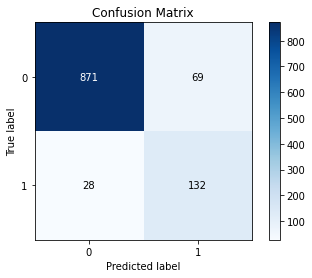

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred ) #, normalize=True)

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred ) #, normalize=True)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       940
           1       0.66      0.82      0.73       160

    accuracy                           0.91      1100
   macro avg       0.81      0.88      0.84      1100
weighted avg       0.92      0.91      0.92      1100



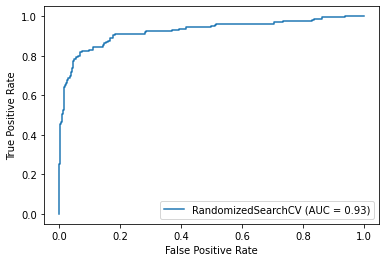

In [ ]:
metrics.plot_roc_curve(RdSearch, X_test, y_test)

In [ ]:
#AUC    قياس درجة  دقة  التنبؤ لمعيار 
f'Best AUC Score: {RdSearch.best_score_ :.3}' 


'Best AUC Score: 0.839'

In [ ]:
# جدول الأحتمالات
y_probas = RdSearch.predict_proba(X_test)


In [ ]:
y_probas

array([[0.3576581 , 0.6423419 ],
       [0.9894526 , 0.01054742],
       [0.06790584, 0.93209416],
       ...,
       [0.91335726, 0.08664273],
       [0.05700874, 0.94299126],
       [0.5747571 , 0.42524293]], dtype=float32)

In [ ]:
((y_probas>0.5)+0)

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [ ]:
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
#  اشتقاق جدول التنبؤات
((y_probas>0.5)+0)[:,1]

array([1, 0, 1, ..., 0, 1, 0])

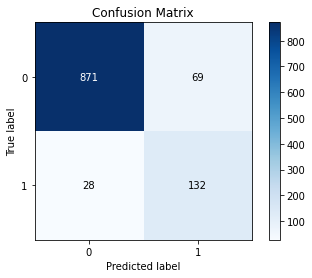

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, ((y_probas>0.5)+0)[:,1] ) #, normalize=True)

-  اسوء نتيجة هي تلك التي تنبأ بها النموذج على أن العميل لن يقطع عقده مع شركة الاتصالات ولكنه  على عكس المتوقع قطعه.
- لذا فإن الشكرة مستعدة لتفعيل حزمة من التدابير مثا تمتيع العميل بترقية للخدمات حتى تبقي عليه .

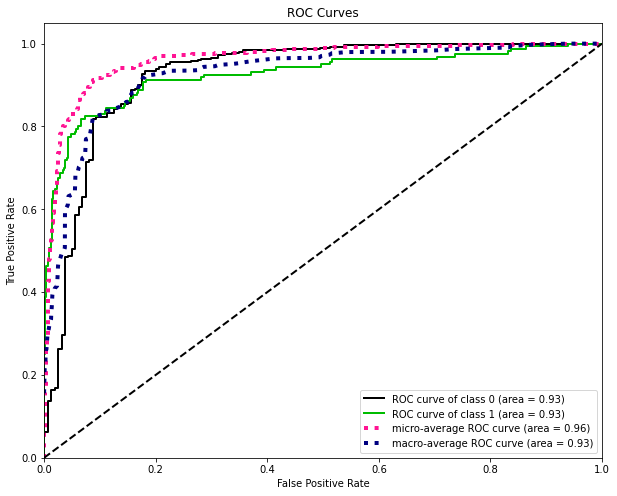

In [ ]:
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

![](https://www.researchgate.net/profile/Md_Ashraful_Amin/publication/220176738/figure/fig4/AS:669969142534168@1536744499664/The-confusion-matrix-left-and-the-calculation-of-true-positive-rate-false-positive.png)

- The ROC in the figure has a high AUC. We can also see there’s a point on the graph where TPR(sensitivity) is quite high and FPR(1-specificity) is dramatically low. If we go back and look at our business need, we needed a high TPR and low FPR that is exactly what we are getting from that point on this ROC. The threshold corresponding to that point can be said to be the best threshold value. 
https://towardsdatascience.com/demystifying-confusion-matrix-29f3037b0cfa

- F1-Score
In practice, when we try to increase the precision of our model, the recall goes down, and vice-versa. The F1-score captures both the trends in a single value:

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


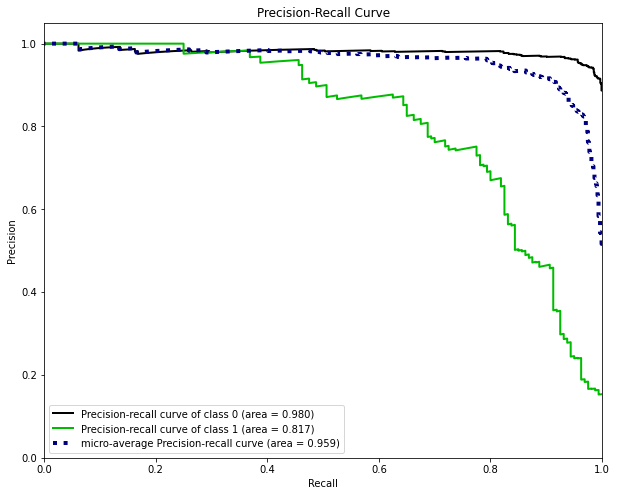

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_test, y_probas, figsize=(10, 8))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


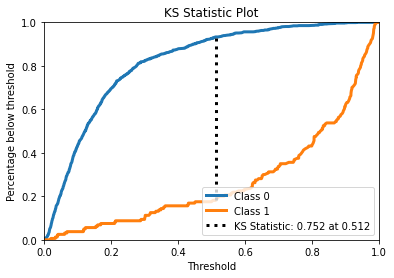

In [ ]:
# AUC تخطيط    
# The K-S statistic plot, or the Kolmogorov Smirnov statistic plot, is a plot that tells you whether the model gets confused 
#when it comes to predicting the different labels in your dataset

skplt.metrics.plot_ks_statistic(y_test, y_probas)

![](https://newbiettn.github.io/images/confusion-matrix-noted.jpg)

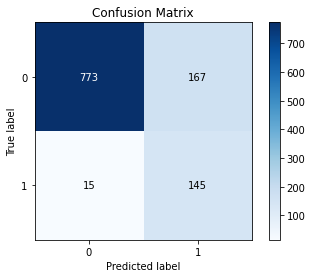

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, ((y_probas>0.3)+0)[:,1] ) #, normalize=True)

In [ ]:
# pickel

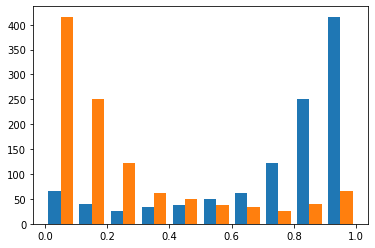

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_probas)
plt.show()

- Now coming to the business part, the Telecom company efficiently is balancing between reducing Churners (increasing TPR) and reducing wrong classification of good customers as probable Churners (lowering FPR).
- Therefore the organisation in this case can’t just rely on the **Accuracy** of the model.   

In [ ]:
metrics.confusion_matrix(y_test, ((y_probas>0.3)+0)[:,1]) 

array([[773, 167],
       [ 15, 145]])

- Finding the optimal cutoff¶
It’s clear that false negatives are substantially more costly than false positives. Instead of optimizing for error based on the number of customers, we should be minimizing a cost function that looks like this:

قيمة الخسائر التي ستنمى بها شركة الاتصالات   في حالة مغادرة حرفائها

Cost  = $500 * FN(C) + $0 * TN(C) + $100 * FP(C) + $100 * TP(C)
FN(C) means that the fal

In [ ]:
np.array([[0, 100], [500, 100]])              

array([[  0, 100],
       [500, 100]])

- Matrix Multiplication
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/313px-Matrix_multiplication_diagram_2.svg.png)

In [ ]:
 np.array([[0, 100], [500, 100]])*metrics.confusion_matrix(y_test, ((y_probas>0.3)+0)[:,1]) 

array([[    0, 16700],
       [ 7500, 14500]])

In [ ]:
#
np.sum(np.array([[0, 100], [500, 100]]) * 
                               metrics.confusion_matrix(y_test, ((y_probas>0.3)+0)[:,1])
                               )

38700

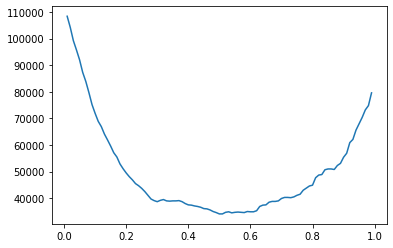

Cost is minimized near a cutoff of: 0.5 for a cost of: 34100


In [ ]:
cutoffs = np.arange(0.01, 1, 0.01)
costs = []
for c in cutoffs:
    costs.append(  
        np.sum(np.array([[0, 100], [500, 100]]) * 
                               metrics.confusion_matrix(y_test, ((y_probas>c)+0)[:,1])
                               )
        )
          

costs = np.array(costs)
plt.plot(cutoffs, costs)
plt.show()
print('Cost is minimized near a cutoff of:', cutoffs[np.argmin(costs)], 'for a cost of:', np.min(costs))

-   0.5  يتضح لنا أن افضل معيار لتحديد جدول التنبؤات والذي يقلل من تلكفة  خسار شركة الاتصالات من خلال مغادرة العملاء هو 

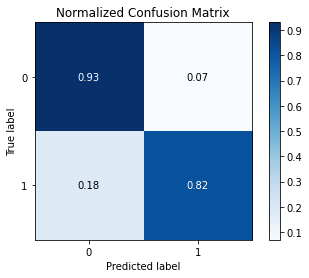

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, ((y_probas>0.5)+0)[:,1] ,  normalize=True)